<a href="https://colab.research.google.com/github/dmosh/computervision/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image filtering** 

Assess the performance of the following image filters in relation to image smoothing and sharpening.

In [10]:
"""Importing the necessary libraries"""
import cv2 as cv
import numpy as np
import sys
import glob
from google.colab import drive
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

importing the image files

In [11]:
drive.mount("/content/drive/")
file = '/content/drive/MyDrive/Colab Notebooks/assignment2/images/*.jpg' 
glob.glob(file)
# Using List Comprehension to read all images
images = [cv.imread(image) for image in glob.glob(file)]


"""imgp = "https://github.com/dmosh/computervision/blob/main/images/frame18756.jpg"
# using imread()  
img = cv.imread(imgp)

im1 = cv.blur(img,(5,5))
im2 = cv.boxFilter(img, -1, (2, 2), normalize=True)  

cv.imshow('image', np.hstack((im1, im2)))
cv.waitKey(0);
cv.destroyAllWindows();
cv.waitKey(1)"""


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


'imgp = "https://github.com/dmosh/computervision/blob/main/images/frame18756.jpg"\n# using imread()  \nimg = cv.imread(imgp)\n\nim1 = cv.blur(img,(5,5))\nim2 = cv.boxFilter(img, -1, (2, 2), normalize=True)  \n\ncv.imshow(\'image\', np.hstack((im1, im2)))\ncv.waitKey(0);\ncv.destroyAllWindows();\ncv.waitKey(1)'

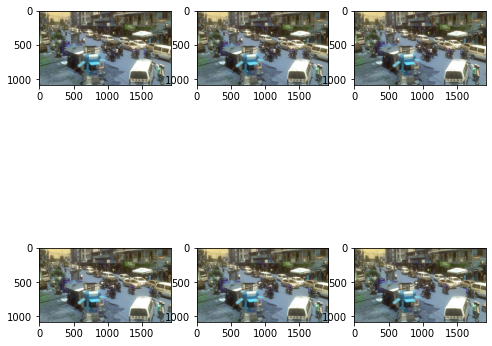

IndexError: ignored

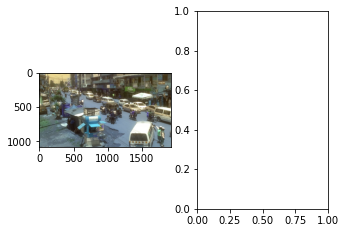

In [13]:
#Loop through the files
# Define row and cols in the figure
rows, cols = 2, 3
for i in range(0, len(images), rows*cols):
    fig=plt.figure(figsize=(8, 8))
    for j in range(0, cols*rows):
        fig.add_subplot(rows, cols, j+1)
        plt.imshow(images[i+j])
    plt.show()

**Average filter**

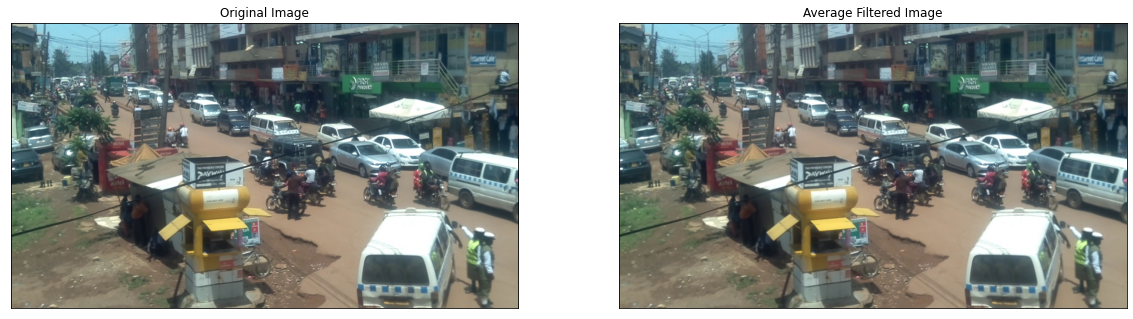

'print("Average Filtered image")\ncv2_imshow(img_fil)\n#cv2_imshow(img_fi)\ncv.waitKey(0)'

In [14]:
#implementing the average filter
imgPath = "/content/drive/MyDrive/Colab Notebooks/assignment2/images/frame18756.jpg"

# using imread()  
img = cv.imread(imgPath)

#convert image to rgb
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#filtering the image
img_fil = cv.blur(img, (3,3))

plt.figure(figsize=(20, 16))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_fil),plt.title('Average Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()



#img_fi = cv.blur(img, (7,7))
"""print("Average Filtered image")
cv2_imshow(img_fil)
#cv2_imshow(img_fi)
cv.waitKey(0)"""

# Findings for average filter
This will produce a small square of size 3x3 in the center and we note that since the filter is normalised, if we increase the size of the filter, the intesity values of the square in the ouput image will be more lower. Hence, making it more challenging to be detected.


# **Median filter**

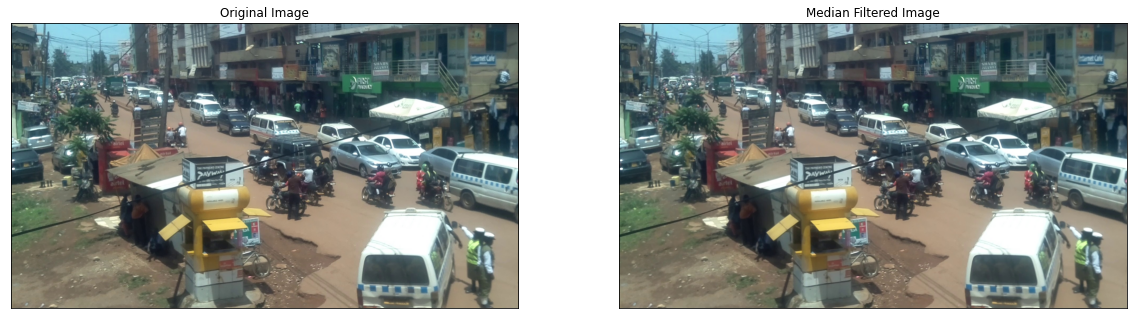

In [15]:
#implementing the median filter
imgPath = "/content/drive/MyDrive/Colab Notebooks/assignment2/images/frame18757.jpg"

# using imread()  
img = cv.imread(imgPath)

#convert image to rgb
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#filtering the image
img_fil = cv.medianBlur(img,3)

plt.figure(figsize=(20, 16))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_fil),plt.title('Median Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

# Findings for median filter


# **Gaussian filter**


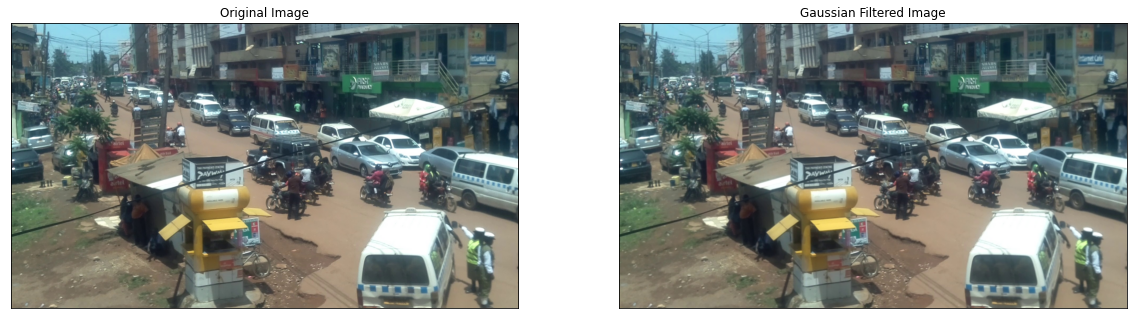

In [16]:
#implementing the Gaussian filter
imgPath = "/content/drive/MyDrive/Colab Notebooks/assignment2/images/frame18758.jpg"

#using imread()  
img = cv.imread(imgPath)

#convert image to rgb
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Gaussian filter
img_fil = cv.GaussianBlur(img,(3, 3), 5, cv.BORDER_DEFAULT)

plt.figure(figsize=(20, 16))
plt.subplot(121),plt.imshow(img),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_fil),plt.title('Gaussian Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

# Findings for Gaussian filter


# **Edge Detection**

**Sobel edge detection**


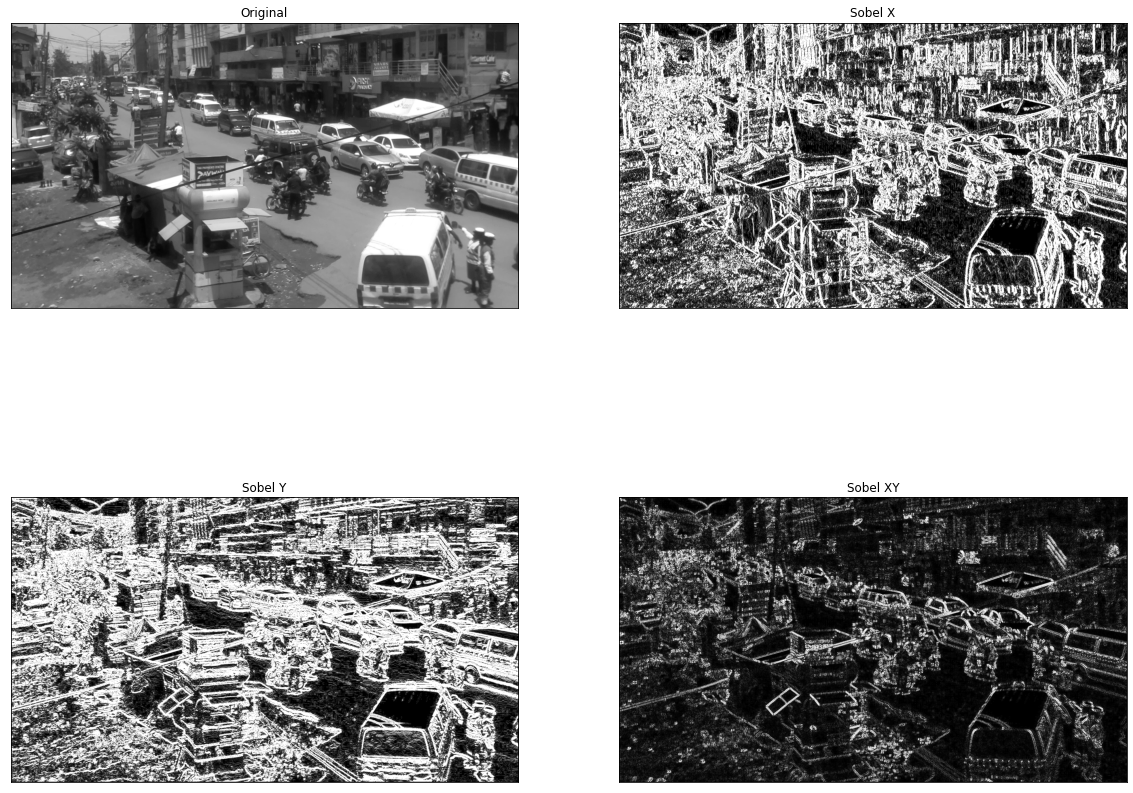

In [23]:
imgPath = "/content/drive/MyDrive/Colab Notebooks/assignment2/images/frame18760.jpg"

#using imread()  
img = cv.imread(imgPath)

#convert image to rgb
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#remove noise using gaussian filter
img_fil = cv.GaussianBlur(img,(3, 3), 0)

# convolute with proper kernels
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)  # x
sobelx_fil = cv.convertScaleAbs(sobelx)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)  # y
sobely_fil = cv.convertScaleAbs(sobely)
sobelxy = cv.Sobel(img,cv.CV_64F,1,1,ksize=5)  # xy
sobelxy_fil = cv.convertScaleAbs(sobelxy)

plt.figure(figsize=(20, 16))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx_fil,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely_fil,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelxy_fil,cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])

plt.show()

# Sobel edge detection findings

# **Roberts edge detection**


In [24]:
imgPath = "/content/drive/MyDrive/Colab Notebooks/assignment2/images/frame18763.jpg"

#using imread()  
img = cv.imread(imgPath)

#convert image to rgb
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#remove noise using gaussian filter
img_fil = cv.GaussianBlur(img,(3, 3), 0)

#Applying kernels for Roberts edge detection
kernelx = np.array( [ [ 1 , 0 ] , [ 0 , -1]]) 
kernely = np.array( [ [ 0 , 1 ] , [ -1 , 0]])
